In [24]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.misc import derivative

<ipython-input-24-3406144487>:6: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy.misc import derivative


ImportError: cannot import name 'derivative' from 'scipy.misc' (/usr/local/lib/python3.11/dist-packages/scipy/misc/__init__.py)

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



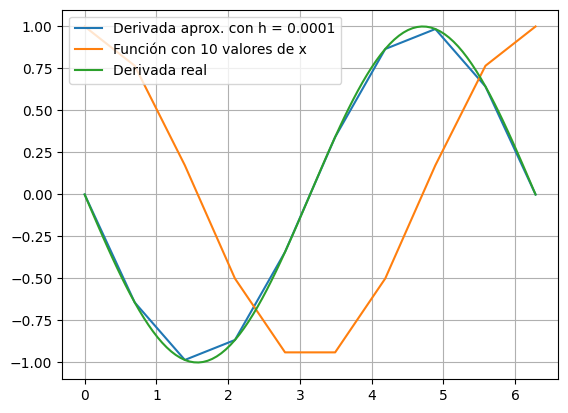

In [7]:
def five_point_derivative(f, x, h):
    return (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)) / (12 * h)

# Función y derivada exacta
f = lambda x: np.cos(x)
x_vals = np.linspace(0, 2 * np.pi, 10)
y_vals = f(x_vals)
f_deriv = lambda x: -np.sin(x)
h_fijo = 0.0001
x_interp = np.linspace(0, 2 * np.pi, 100)
y_prima = f_deriv(x_interp)

derivada_aprox = [five_point_derivative(f, x, h_fijo) for x in x_vals]
plt.plot(x_vals, derivada_aprox, label = 'Derivada aprox. con h = 0.0001')
plt.plot(x_vals, y_vals, label = 'Función con 10 valores de x')
plt.plot(x_interp, y_prima, label = 'Derivada real')
plt.grid()
plt.legend()

El valor exacto es -0.3826834323650898
Con h = 1, el aproximado es -0.3713604962 y el error respecto a la función real es: 1.13e-02
Con h = 0.1, el aproximado es -0.3826821583 y el error respecto a la función real es: 1.27e-06
Con h = 0.01, el aproximado es -0.3826834322 y el error respecto a la función real es: 1.28e-10
Con h = 0.001, el aproximado es -0.3826834324 y el error respecto a la función real es: 2.09e-14
Con h = 0.0001, el aproximado es -0.3826834324 y el error respecto a la función real es: 2.47e-13


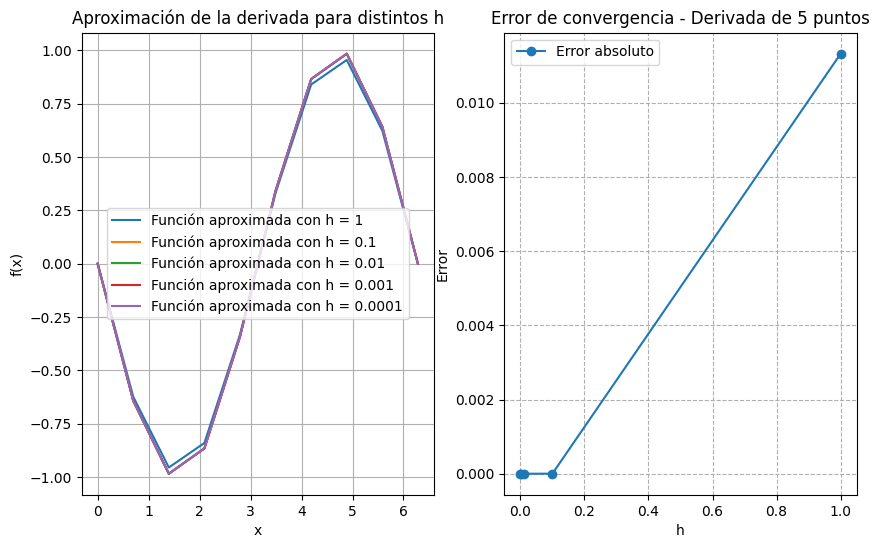

In [9]:
x0 = np.pi / 8
# Lista de h
valores_h = [1, 0.1, 0.01, 0.001, 0.0001]
errores = []
exacta = f_deriv(x0)
print(f'El valor exacto es {exacta}')
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.title("Aproximación de la derivada para distintos h")
plt.xlabel('x')
plt.ylabel('f(x)')
for h in valores_h:
    derivada_plot = [five_point_derivative(f, x, h) for x in x_vals]
    aprox = five_point_derivative(f, x0, h)
    error = abs(aprox - exacta)
    errores.append(error)
    plt.plot(x_vals, derivada_plot, label = f'Función aproximada con h = {h}')
    plt.legend()
    plt.grid()
    print(f"Con h = {h}, el aproximado es {aprox:.10f} y el error respecto a la función real es: {error:.2e}")

# Gráfica
plt.subplot(1, 2, 2)
plt.plot(valores_h, errores, 'o-', label="Error absoluto")
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Error de convergencia - Derivada de 5 puntos")
plt.grid(True, which="both", ls="--")
plt.legend()

In [10]:
h_2 = 0.05
x_0 = np.pi/8
aprox_2 = five_point_derivative(f, x_0, h_2)
print(f'Con h = {h_2}, f(pi/2) = {aprox_2}')
Error_h2 = abs(exacta - aprox_2)
print(f'Error con h = 0.05 = {Error_h2}')
print(f'\nError para distintos h \n')
#veamos para otros valores de h
h_2_vals = [10, 1, 0.1, 0.001, 0.0001]
for h in h_2_vals:
  aprox_h2 = five_point_derivative(f, x_0, h)
  Error_h_2 = abs(exacta - aprox_h2)
  print(f'Con h = {h} el error es: {Error_h_2}')

Con h = 0.05, f(pi/2) = -0.3826833526630986
Error con h = 0.05 = 7.970199117357524e-08

Error para distintos h 

Con h = 10 el error es: 0.41626463153281584
Con h = 1 el error es: 0.011322936152264818
Con h = 0.1 el error es: 1.2740937423982857e-06
Con h = 0.001 el error es: 2.09277040141842e-14
Con h = 0.0001 el error es: 2.4741320103771614e-13


## Conclusión

Como se vé en los resultados, entre más pequeño sea el h, menor será el error respecto a la función real

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [11]:

def forward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia adelante.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia atrás.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x - h)) / (2 * h)

In [20]:
def Diferencias_Finitas(f, h):
  '''
  Calcula la primera derivada de f usando las diferencias finitas.
  f: función
  h: paso de discretización
  return: primera derivada de f usando las diferencias finitas (función)
  '''
  def Derivada(x):
    '''
    Calcula la primera derivada de f en x usando las diferencias finitas.
    x: punto en el que se quiere calcular la derivada
    return: primera derivada de f en x
    '''
    n = len(x)
    fprime = np.zeros_like(x, dtype=float) # Crea un array para guardar los datos
    if np.isscalar(x):
        x = np.array([x])
    for i in range(n):
      if i == 0: # Condicion para el primer punto
        fprime[i] = forward_diff(f, x[i], h)
      elif i == n-1: # Condición para el último punto
        fprime[i] = backward_diff(f, x[i], h)
      else:
        fprime[i] = centered_diff(f, x[i], h) # Diferencias centradas
    return fprime

  return Derivada

In [23]:
f = lambda x: x*np.exp(x)
df = lambda x: (1 + x) * np.exp(x)
x_eval = 2
x_vals = np.linspace(1.8, 2.2, 6)
h = x_vals[1] - x_vals[0]

df_aprox_1 = Diferencias_Finitas(f, h)
df_aprox = df_aprox_1(x_vals)

df2_aprox_1 = Diferencias_Finitas(df, h)
df2_aprox = df2_aprox_1(x_vals)

Point = np.argmin(np.abs(x_vals - 2.0))

print(f'Primera derivada aproximada en x = 2.0: {df_aprox[Point]}')
print(f'Segunda derivada aproximada en x = 2.0: {df2_aprox[Point]}')

x = np.linspace(1.8, 2.2, 100)

Primera derivada aproximada en x = 2.0: 21.0515851549612
Segunda derivada aproximada en x = 2.0: 28.158487259260266


Valor óptimo de h: 0.01


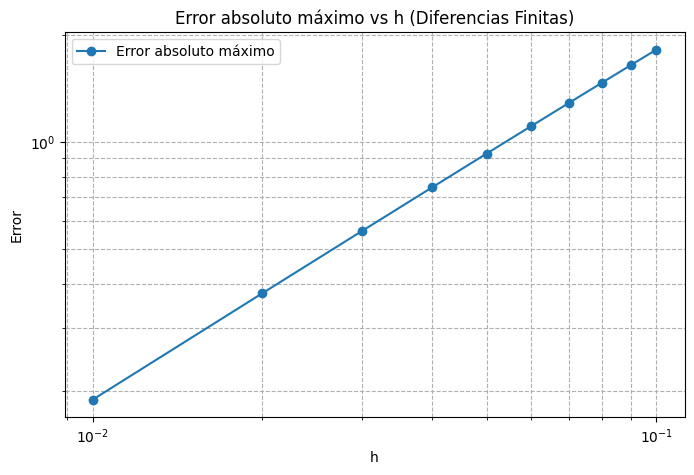

In [35]:
x_sym = sp.Symbol('x')
f_sym = x_sym * sp.exp(x_sym)
f_prime_exact = sp.lambdify(x_sym, sp.diff(f_sym, x_sym), 'numpy')

# Derivada exacta en cada punto
f_exact_vals = f_prime_exact(x_vals)

h_vals = np.linspace(0.01, 0.1, 10)

errors = []

for h in h_vals:
    derivada = Diferencias_Finitas(f, h)
    f_aprox_vals = derivada(x_vals)
    error = np.max(np.abs(f_aprox_vals - f_exact_vals))
    errors.append(error)

plt.figure(figsize=(8, 5))
plt.loglog(h_vals, errors, 'o-', label='Error absoluto máximo')
plt.xlabel('h')
plt.ylabel('Error')
plt.title("Error absoluto máximo vs h (Diferencias Finitas)")
plt.grid(True, which='both', linestyle='--')
plt.legend()

h_opt = h_vals[np.argmin(errors)]
print(f"Valor óptimo de h: {h_opt}")